In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-3b5970faf0be>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\putinmissing.csv', encoding = 'utf-8', header = None)

In [4]:
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']

In [5]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label
0,576171827086520320,1093610112,#PUTIN FULL OF LEAD\n #ПутинУмер #putindead http://t.co/DjFt2BgV6x,Fri Mar 13 00:04:02 +0000 2015,5.763882e+17,1.317093e+09,"@CWynnykWilson ""Gas up!""",Fri Mar 13 14:23:53 +0000 2015,0
1,576185920094908416,458173,Surprised it took me so long to stumble across this image today...\n\n#putindead #WeekendAtVlads http://t.co/OLzO5n1gwF,Fri Mar 13 01:00:03 +0000 2015,NaN,NaN,NaN,NaN,0
2,576249853979807745,44691136,#PutinDead - Amazing how quickly the satirical songs and videos are produced. #путинумер #ПутинСдох http://t.co/Oeg3emWcEC,Fri Mar 13 05:14:06 +0000 2015,NaN,NaN,NaN,NaN,0
3,576316647880839168,285312699,#putindead I heard it from a good source that Vladimir Putin was riding a weasel on the back of a woodpecker and he fell off and died.,Fri Mar 13 09:39:30 +0000 2015,5.763988e+17,3.077746e+09,@nikkimcwatters http://t.co/xSFvkAnTje,Fri Mar 13 15:05:48 +0000 2015,0
4,576316647880839168,285312699,#putindead I heard it from a good source that Vladimir Putin was riding a weasel on the back of a woodpecker and he fell off and died.,Fri Mar 13 09:39:30 +0000 2015,5.794791e+17,8.445691e+07,"@nikkimcwatters \nI wish I understood why Putin is so despised. He's got to be better than Blaster Boris, and the Russians seem to like him.",Sun Mar 22 03:06:09 +0000 2015,0


In [6]:
df.shape

(697, 9)

+ change data type

In [7]:
df.src_tweet_id = df.src_tweet_id.astype(str)
df.src_user_id = df.src_user_id.astype(str)

df.reply_tweet_id = df.reply_tweet_id.astype(str)
df.reply_tweet_id = df.reply_tweet_id.replace('nan',np.nan)

df.reply_user_id = df.reply_user_id.astype(str)
df.reply_user_id = df.reply_user_id.replace('nan',np.nan)

df.src_date = df.src_date.apply(pd.to_datetime)
df.reply_date = df.reply_date.apply(pd.to_datetime)

df.reply_tweet = df.reply_tweet.replace(np.nan,"")

+ Source Tweet Data: **src_tw_df**

In [8]:
#Source tweet data
src_tw_df = df.iloc[:,[0,1,2,3,8]].copy()
src_tw_df = src_tw_df.drop_duplicates().reset_index()

In [9]:
src_tw_df.head()

,index,src_tweet_id,src_user_id,src_tweet,src_date,label
0,0,576171827086520320,1093610112,#PUTIN FULL OF LEAD\n #ПутинУмер #putindead http://t.co/DjFt2BgV6x,2015-03-13 00:04:02+00:00,0
1,1,576185920094908416,458173,Surprised it took me so long to stumble across this image today...\n\n#putindead #WeekendAtVlads http://t.co/OLzO5n1gwF,2015-03-13 01:00:03+00:00,0
2,2,576249853979807745,44691136,#PutinDead - Amazing how quickly the satirical songs and videos are produced. #путинумер #ПутинСдох http://t.co/Oeg3emWcEC,2015-03-13 05:14:06+00:00,0
3,3,576316647880839168,285312699,#putindead I heard it from a good source that Vladimir Putin was riding a weasel on the back of a woodpecker and he fell off and died.,2015-03-13 09:39:30+00:00,0
4,5,576321776424189954,8628872,"Enter 'Putin' into Twitter search. Look at all the clowns suggesting he's dead/a palace coup. Now, never take any of them seriously again",2015-03-13 09:59:53+00:00,0


# EDA

## Missing Value

In [10]:
df.isnull().sum()

src_tweet_id      0  
src_user_id       0  
src_tweet         0  
src_date          0  
reply_tweet_id    100
reply_user_id     100
reply_tweet       0  
reply_date        100
label             0  
dtype: int64

+ drop rows where there is missing value.

In [11]:
df.dropna(inplace=True)

## Statistics

In [12]:
print("# of source tweets:",src_tw_df.src_tweet_id.nunique())
print("# of source users:",src_tw_df.src_user_id.nunique())
print("# of reply users:",df.reply_user_id.nunique())
print("# of reply tweets:",df.reply_tweet_id.nunique())

# of source tweets: 238
# of source users: 194
# of reply users: 430
# of reply tweets: 597


## Visualiztion 

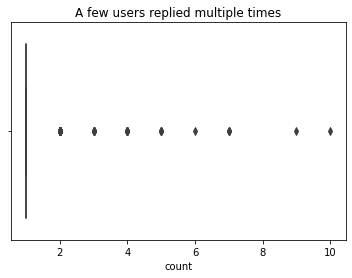

In [13]:
reply_user = df.reply_user_id.value_counts().sort_values(ascending=False).to_frame()
reply_user.rename(columns={'reply_user_id' :'count'},inplace=True)
sns.boxplot(data=reply_user ,x='count')
plt.title("A few users replied multiple times")
plt.savefig('graph/putinmissing/reply_user-1.pdf',dpi=300)

In [14]:
more_freq_reply_user = reply_user.loc[reply_user['count'] > 1].index
len(more_freq_reply_user)

84

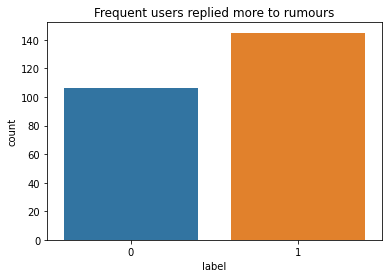

In [15]:
more_freq = df[df['reply_user_id'].isin(more_freq_reply_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Frequent users replied more to rumours')
plt.savefig('graph/putinmissing/reply_user-2.pdf',dpi=300)

            count
52003080    11   
448590097   5    
166530562   4    
15438913    3    
2789194858  3    
...        ..    
1925331925  1    
766462243   1    
54345317    1    
516525338   1    
403899803   1    

[194 rows x 1 columns]


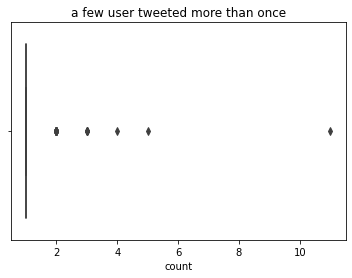

<Figure size 432x288 with 0 Axes>

In [16]:
source_user = src_tw_df.src_user_id.value_counts().sort_values(ascending=False).to_frame()
source_user.rename(columns={'src_user_id' :'count'},inplace=True)
print(source_user)
sns.boxplot(data=source_user ,x='count')
plt.title('a few user tweeted more than once',fontsize = 12)
plt.show()
plt.savefig('graph/putinmissing/source_user-1.pdf',dpi=300)

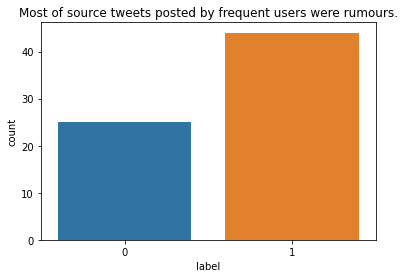

In [17]:
more_freq_src_user = source_user.loc[source_user['count'] > 1].index
more_freq_src_user
more_freq = src_tw_df[src_tw_df['src_user_id'].isin(more_freq_src_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Most of source tweets posted by frequent users were rumours.')
plt.savefig('graph/putinmissing/src_user-2.pdf',dpi=300)

In [ ]:
df.groupby('src_tweet_id')['label'].value_counts().sort_values('label')#.plot(kind = 'bar')
# plt.title('Rumour tweet are more than non-rumor tweet',fontsize = 14)
# plt.xlabel('Rumor / Non-Rumour', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()